<a href="https://colab.research.google.com/github/Schota/shares/blob/master/Digit_recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import cv2 as cv

from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
from keras.optimizers import Adam,RMSprop 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import pickle

%matplotlib inline

##Import dataset

Trainset

In [ ]:
np.random.seed(1)
df_train = pd.read_csv("train.csv") 
df_train = df_train.iloc[np.random.permutation(len(df_train))]

In [ ]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5192,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample_size = df_train.shape[0] # Training set size
validation_size = int(df_train.shape[0]*0.1) # Validation set size 

# train_x and train_y
train_x = np.asarray(df_train.iloc[:sample_size-validation_size,1:]).reshape([sample_size-validation_size,28,28,1]) # taking all columns expect column 0
train_y = np.asarray(df_train.iloc[:sample_size-validation_size,0]).reshape([sample_size-validation_size,1]) # taking column 0

# val_x and val_y
val_x = np.asarray(df_train.iloc[sample_size-validation_size:,1:]).reshape([validation_size,28,28,1])
val_y = np.asarray(df_train.iloc[sample_size-validation_size:,0]).reshape([validation_size,1])

In [ ]:
train_x.shape,train_y.shape

((37800, 28, 28, 1), (37800, 1))

Testset

In [ ]:
df_test = pd.read_csv("test.csv")
test_x = np.asarray(df_test.iloc[:,:]).reshape([-1,28,28,1])

Pixels normalization

In [ ]:
train_x = train_x/255
val_x = val_x/255
test_x = test_x/255

##Building model

In [ ]:
model = models.Sequential()

In [ ]:
# Block 1
model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation="sigmoid"))

##Compilation

In [ ]:
initial_lr = 0.001
loss = "sparse_categorical_crossentropy"
model.compile(Adam(lr=initial_lr), loss=loss ,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

training

In [ ]:
epochs = 20
batch_size = 256
history_1 = model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,validation_data=[val_x,val_y])

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 153s 4ms/step - loss: 0.4693 - accuracy: 0.8593 - val_loss: 0.1331 - val_accuracy: 0.9617
Epoch 2/20
37800/37800 [==============================] - 151s 4ms/step - loss: 0.0903 - accuracy: 0.9721 - val_loss: 0.0733 - val_accuracy: 0.9776
Epoch 3/20
37800/37800 [==============================] - 151s 4ms/step - loss: 0.0610 - accuracy: 0.9811 - val_loss: 0.0553 - val_accuracy: 0.9821
Epoch 4/20
37800/37800 [==============================] - 154s 4ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 5/20
37800/37800 [==============================] - 153s 4ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0519 - val_accuracy: 0.9855
Epoch 6/20
37800/37800 [==============================] - 152s 4ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 7/20
37800/37800 [==============================] - 149s 

##Training performance

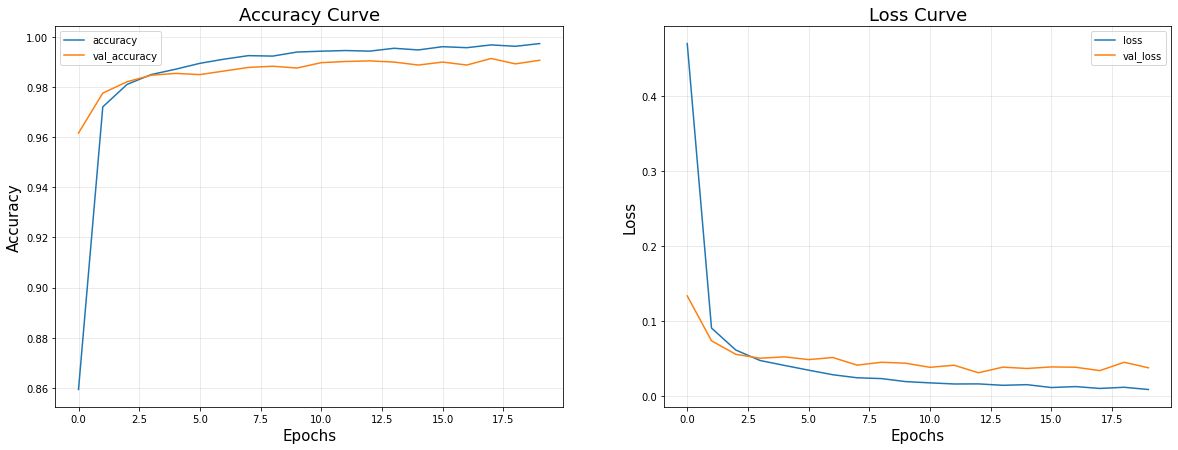

In [ ]:
# Diffining Figure
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)

plt.plot(history_1.epoch,history_1.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_1.epoch,history_1.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_1.epoch,history_1.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_1.epoch,history_1.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

There is a slight overfitting indication.

Checking error in validation set.

In [ ]:
val_p = np.argmax(model.predict(val_x),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(val_x.shape[0]):
    confusion_matrix[val_y[i],val_p[i]] += 1
    if val_y[i]!=val_p[i]:
        error +=1
        
print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])

Confusion Matrix: 

 [[406.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 472.   2.   0.   0.   0.   1.   6.   1.   0.]
 [  0.   0. 418.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   1. 458.   0.   1.   0.   0.   1.   2.]
 [  1.   0.   1.   0. 410.   0.   2.   1.   0.   2.]
 [  0.   0.   0.   0.   0. 379.   0.   0.   0.   1.]
 [  0.   0.   1.   0.   1.   1. 387.   0.   1.   0.]
 [  0.   0.   2.   0.   0.   0.   0. 450.   0.   0.]
 [  1.   0.   1.   0.   0.   0.   0.   0. 395.   1.]
 [  1.   0.   0.   0.   3.   1.   0.   1.   0. 386.]]

Errors in validation set:  39

Error Persentage :  0.9285714285714286

Accuracy :  99.07142857142857

Validation set Shape : 4200


##Result Improvisation

1. Image augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

2. Learning rate

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5, min_lr=0.00001)

##Retraining

In [ ]:
epochs = 20
history_2 = model.fit_generator(datagen.flow(train_x,train_y, batch_size=batch_size),steps_per_epoch=int(train_x.shape[0]/batch_size)+1,epochs=epochs,validation_data=[val_x,val_y],callbacks=[lrr])

Epoch 1/20
148/148 [==============================] - 159s 1s/step - loss: 0.1288 - accuracy: 0.9620 - val_loss: 0.0352 - val_accuracy: 0.9888
Epoch 2/20
148/148 [==============================] - 154s 1s/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.0428 - val_accuracy: 0.9881
Epoch 3/20
148/148 [==============================] - 156s 1s/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0250 - val_accuracy: 0.9936
Epoch 4/20
148/148 [==============================] - 155s 1s/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0284 - val_accuracy: 0.9919
Epoch 5/20
148/148 [==============================] - 159s 1s/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0372 - val_accuracy: 0.9910

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
148/148 [==============================] - 155s 1s/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 0.9931
Epoch 7/20
148/148 [==============================] - 156s 1s

##Retraining performance

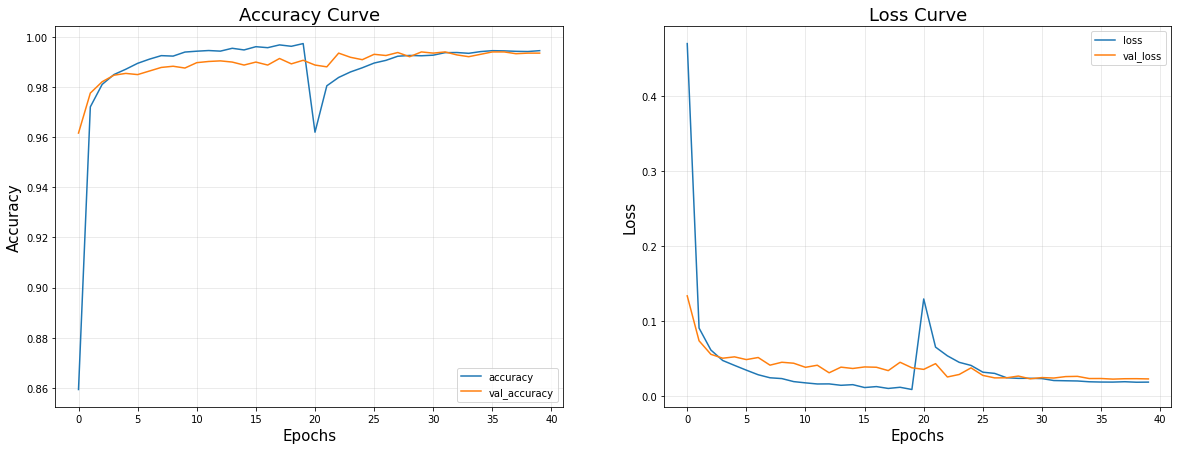

In [ ]:
# Diffining Figure
f = plt.figure(figsize=(20,7))
f.add_subplot(121)

#Adding Subplot 1 (For Accuracy)
plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['accuracy']+history_2.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['val_accuracy']+history_2.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['loss']+history_2.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['val_loss']+history_2.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


Confusion matrix

In [ ]:
val_p = np.argmax(model.predict(val_x),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(val_x.shape[0]):
    confusion_matrix[val_y[i],val_p[i]] += 1
    if val_y[i]!=val_p[i]:
        error +=1
        
confusion_matrix,error,(error*100)/val_p.shape[0],100-(error*100)/val_p.shape[0],val_p.shape[0]

print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])


Confusion Matrix: 

 [[405.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 478.   0.   0.   0.   0.   1.   3.   0.   0.]
 [  0.   0. 417.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0. 462.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0. 415.   0.   1.   0.   0.   1.]
 [  0.   0.   0.   0.   0. 378.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   2.   1. 387.   0.   1.   0.]
 [  0.   1.   4.   0.   1.   0.   0. 446.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0. 397.   0.]
 [  0.   0.   1.   0.   2.   1.   0.   0.   0. 388.]]

Errors in validation set:  27

Error Persentage :  0.6428571428571429

Accuracy :  99.35714285714286

Validation set Shape : 4200


##Prediction

In [ ]:
test_y = np.argmax(model.predict(test_x),axis =1)

##Submission

In [ ]:
df_submission = pd.DataFrame([df_test.index+1,test_y],["ImageId","Label"]).transpose()
df_submission.to_csv("submission.csv",index=False)